<center> <img style="float: center;" src="images/CI_horizontal.png" width="450">
<center>
    <span style="font-size: 1.5em;">
        <a href='https://www.coleridgeinitiative.org'>Website</a>
    </span> 

<center><h1> Preparing and Submitting Files for Export<h1></center>


# Outline 
1. How to prepare an export
    - Creating all necessary files
1. How to submit an export using the files we created
    - Export module


In order to submit a proper export, the following supporting files and information must accompany all export files:
- A documentation file that includes:
    - Export file name 
    - Name of the supporting files that contain the required counts for each reported statistic
    - Grouping and filters applied to the original dataset
    - How the export file relates to other files within the same export

>Note: If there are multiple variables subject to disclosure review, you can include the counts for them in the same file.


In [1]:
library(tidyverse)
library(R.utils)
library(ggplot2)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.0 (2020-02-14 07:10:20 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.23.0 successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.9.2 successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is ma

In [2]:
co_xwalk <- read_csv("co_xwalk.csv")

co_wac_2019 <- read_csv('co_wac_S000_JT00_2019.csv')

co_rac_2019 <- read_csv('co_rac_S000_JT00_2019.csv')


Parsed with column specification:
cols(
  .default = col_character(),
  cbsa = col_double(),
  zcta = col_double(),
  zctaname = col_double(),
  stsecon = col_double(),
  stseconname = col_logical(),
  tsub = col_double(),
  tsubname = col_logical(),
  stanrc = col_double(),
  stanrcname = col_logical(),
  necta = col_double(),
  nectaname = col_logical(),
  mil = col_double(),
  blklatdd = col_double(),
  blklondd = col_double(),
  createdate = col_double()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  w_geocode = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  h_geocode = col_character()
)

See spec(...) for full column specifications.



In [3]:
df_inner_join <- inner_join(co_xwalk, co_wac_2019, by = c("tabblk2010" = "w_geocode")) %>%
    select (tabblk2010, C000, CA01, CA02, CA03, ctyname, cbsaname) %>% 
    filter(C000 > 10)

# How to prepare an export


In [4]:
total_jobs_by_county <- df_inner_join %>%
    group_by(ctyname) %>% #grouping by county name
    summarize(
        total_jobs = sum(C000)
    ) %>%
    ungroup()  %>% # cant forget to ungroup()
    arrange(desc(total_jobs))

head(total_jobs_by_county)

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,total_jobs
<chr>,<dbl>
"Denver County, CO",518198
"Arapahoe County, CO",329681
"El Paso County, CO",258298
"Jefferson County, CO",244706
"Adams County, CO",222035
"Boulder County, CO",177153


In [5]:
# the census block is the disclosure unit of focus so we need to include that.

total_jobs_by_county <- df_inner_join %>%
    group_by(ctyname) %>% #grouping by county name
    summarize(
        total_jobs = sum(C000), #summing the column C000
        census_block_count = n_distinct(tabblk2010) #getting counts of census blocks 
    ) %>%
    ungroup()  %>% # cant forget to ungroup()
    arrange(desc(total_jobs))

head(total_jobs_by_county)

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,total_jobs,census_block_count
<chr>,<dbl>,<int>
"Denver County, CO",518198,2484
"Arapahoe County, CO",329681,1435
"El Paso County, CO",258298,2248
"Jefferson County, CO",244706,1636
"Adams County, CO",222035,1234
"Boulder County, CO",177153,1135


# Export 1
## Bar Plot

In [6]:
# calculating the proportion of jobs for each county

total_jobs_prop <- total_jobs_by_county %>%
    arrange(desc(total_jobs)) %>%
    mutate(
        prop = total_jobs/sum(total_jobs)*100) # calculating proportions
head(total_jobs_prop)

ctyname,total_jobs,census_block_count,prop
<chr>,<dbl>,<int>,<dbl>
"Denver County, CO",518198,2484,20.189302
"Arapahoe County, CO",329681,1435,12.844567
"El Paso County, CO",258298,2248,10.063443
"Jefferson County, CO",244706,1636,9.533891
"Adams County, CO",222035,1234,8.650615
"Boulder County, CO",177153,1135,6.901986


Now that we have the proportion calculated, we need to apply rounding rules.

**Rounding Rules**

Percentages, proportions and ratios need to be rounded - First must apply the rounding rules to both the numerator and denominator, before calculating proportions. Once the proportions are calculated, they must be rounded to the nearest hundredth (.01) or the nearest percent if using whole numbers (1%).

Because we have counts of jobs, we need to apply appropriate rounding rules. Counts between 0-999 must be rounded to the nearest 10 and counts above 999 to the nearest 100.

In [7]:
total_jobs_prop_rounded <- total_jobs_prop %>%
    mutate(
        total_jobs_rounded = ifelse(total_jobs < 1000, #applying rounding rules
                                    round(total_jobs, digits = -1), 
                                    round(total_jobs, digits = -2)),
    prop_rounded = round(total_jobs_rounded/sum(total_jobs_rounded),2) *100) %>% 
    head()

total_jobs_prop_rounded

ctyname,total_jobs,census_block_count,prop,total_jobs_rounded,prop_rounded
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"Denver County, CO",518198,2484,20.189302,518200,20
"Arapahoe County, CO",329681,1435,12.844567,329700,13
"El Paso County, CO",258298,2248,10.063443,258300,10
"Jefferson County, CO",244706,1636,9.533891,244700,10
"Adams County, CO",222035,1234,8.650615,222000,9
"Boulder County, CO",177153,1135,6.901986,177200,7


# Creating Bar Plot

Saving 7 x 7 in image



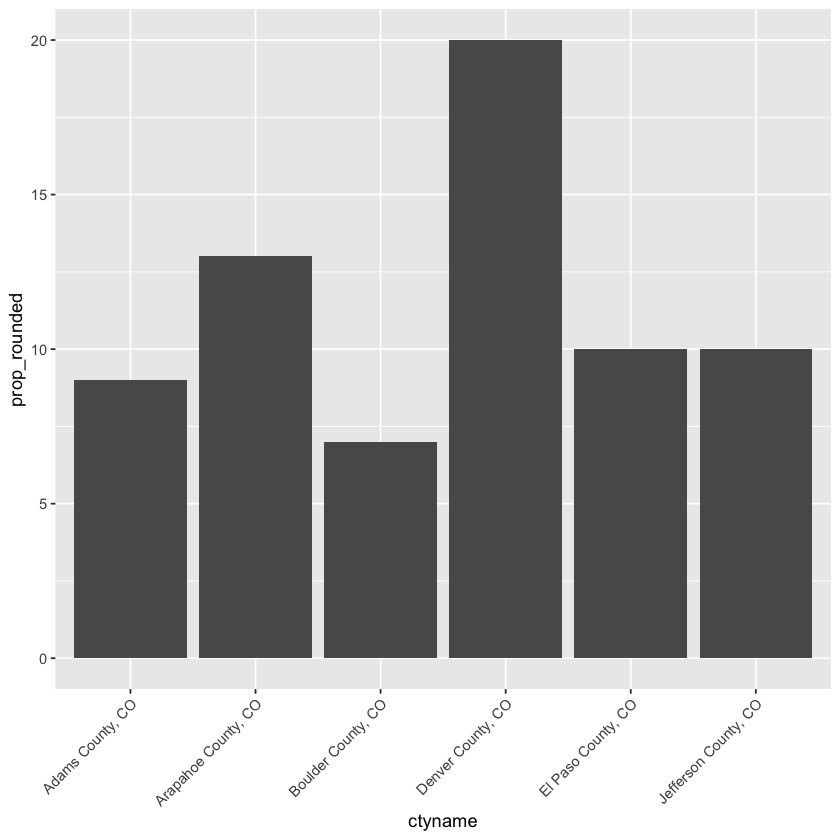

In [8]:
# Basic barplot
ggplot(data=total_jobs_prop_rounded, aes(x=ctyname, y=prop_rounded)) +
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
ggsave("export_1_bar_plot.png")


When we submit the bar plot for export, we need to show the non-rounded counts for each proportion, the counts for each census block, the rounded counts that generated the proportions, and the final rounded proportions and save the resulting data frame. We ask for this because the export team needs to verify that the proper rounding rules are applied. 

In [9]:
total_jobs_prop_rounded %>% write_csv("export_1_counts_for_bar_plot.csv")
total_jobs_prop_rounded

ctyname,total_jobs,census_block_count,prop,total_jobs_rounded,prop_rounded
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"Denver County, CO",518198,2484,20.189302,518200,20
"Arapahoe County, CO",329681,1435,12.844567,329700,13
"El Paso County, CO",258298,2248,10.063443,258300,10
"Jefferson County, CO",244706,1636,9.533891,244700,10
"Adams County, CO",222035,1234,8.650615,222000,9
"Boulder County, CO",177153,1135,6.901986,177200,7


# Export 2

## Exporting a Quantile - Median

Now, using the same data, let’s say we were interested in calculating the median number of jobs per census block in each county.

In [15]:
median_jobs_per_census_block <- df_inner_join %>% 
    group_by(ctyname) %>%
    summarize(
        median_jobs_census_block = median(C000) #calculating the median
    ) %>% arrange(desc(median_jobs_census_block)) %>%
    head()

median_jobs_per_census_block

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,median_jobs_census_block
<chr>,<dbl>
"Gilpin County, CO",83.5
"Crowley County, CO",75.0
"Arapahoe County, CO",56.0
"Denver County, CO",55.0
"Adams County, CO",48.0
"Boulder County, CO",47.0


In [16]:
median_jobs_per_census_block <- df_inner_join %>% 
    group_by(ctyname) %>%
    summarize(
        median_jobs_census_block = median(C000), #calculating the median
        count_census_block = n_distinct(tabblk2010) #variable for disclosure review
    ) %>% arrange(desc(median_jobs_census_block)) %>%
    head()

median_jobs_per_census_block


`summarise()` ungrouping output (override with `.groups` argument)



ctyname,median_jobs_census_block,count_census_block
<chr>,<dbl>,<int>
"Gilpin County, CO",83.5,24
"Crowley County, CO",75.0,9
"Arapahoe County, CO",56.0,1435
"Denver County, CO",55.0,2484
"Adams County, CO",48.0,1234
"Boulder County, CO",47.0,1135


We have calculated the median number of jobs. But we can't export the true median because it may be a data point. Instead, we can export the fuzzy median. We also need to apply the rounding rules before and after calculating the fuzzy median.

Exact percentiles can not be exported - Instead, for example, you may calculate a “fuzzy median” by averaging the true 45th and 55th percentiles.


In [11]:
fuzzy_median_jobs_per_census_block <- df_inner_join %>% 
    group_by(ctyname) %>%
    summarize(
        median_jobs_census_block = median(C000),
        fuzzy_median_jobs = round((quantile(C000, .45) + quantile(C000, .55))/2, 1), #calculating fuzzy median
        count_census_block = n_distinct(tabblk2010) #variable for disclosure review
    ) %>% 
    mutate(
        fuzzy_median_jobs_rounded = round(fuzzy_median_jobs, digits = -1)) %>%
    arrange(desc(median_jobs_census_block)) %>%
    head()

fuzzy_median_jobs_per_census_block

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,median_jobs_census_block,fuzzy_median_jobs,count_census_block,fuzzy_median_jobs_rounded
<chr>,<dbl>,<dbl>,<int>,<dbl>
"Gilpin County, CO",83.5,73.4,24,70
"Crowley County, CO",75.0,76.2,9,80
"Arapahoe County, CO",56.0,57.5,1435,60
"Denver County, CO",55.0,55.5,2484,60
"Adams County, CO",48.0,50.1,1234,50
"Boulder County, CO",47.0,47.5,1135,50


We see that we have a count below 10 for Crowley County, CO. This means we have to redact the `fuzzy_median_jobs_rounded` value for that record. We will replace any value fewer than 9 with `NA`.

In [12]:
export_median_jobs_fuzzy_rounded <- fuzzy_median_jobs_per_census_block %>%
    mutate(fuzzy_median_jobs_rounded = ifelse( #applying rounding rules
            count_census_block < 10, 
               fuzzy_median_jobs_rounded == NA, 
               fuzzy_median_jobs_rounded)) %>%
    select(ctyname, fuzzy_median_jobs_rounded)

export_median_jobs_fuzzy_rounded


ctyname,fuzzy_median_jobs_rounded
<chr>,<dbl>
"Gilpin County, CO",70
"Crowley County, CO",NA
"Arapahoe County, CO",60
"Denver County, CO",60
"Adams County, CO",50
"Boulder County, CO",50


Now that we have applied the rounding rules and created the supporting table with the underlying counts, we need to save both data frames. 

In [13]:
fuzzy_median_jobs_per_census_block %>% write_csv("export_2_data.csv")
export_median_jobs_fuzzy_rounded %>% write_csv("export_2_fuzzy_median_jobs.csv")

# Documentation File 

<html>
  <head>
    <title>Documentation</title>
  </head>
  <body>
      <p>Check out
      <a href="Documentation.pdf" target="_blank rel="noopener noreferrer">Documentation Example</a></p>
  </body>
</html>


# ADRF User Guide

The User Guide is a great reference if there are any questions about the export process or using the ADRF. 

<html>
  <head>
    <title>ADRF User Guide</title>
  </head>
  <body>
      <p>Check out
      <a href="ADRF_user_guide.pdf" target="_blank rel="noopener noreferrer">ADRF User Guide</p>
  </body>
</html>
<br>

<span style="font-size: 1.5em;">
        <a href='https://youtu.be/qXG_i0v_bDQ'>Export Module Video Walk-through</a>
    </span> 

In [14]:
#jupyter nbconvert Export_training.ipynb --to slides --post serve